In [1]:
# import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load datasets
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

In [3]:
# Display basic info and the first few rows of each dataset
print("Calendar Data Overview:")
print(calendar_df.info())
print(calendar_df.head())

print("\nListings Data Overview:")
print(listings_df.info())
print(listings_df.head())

print("\nReviews Data Overview:")
print(reviews_df.info())
print(reviews_df.head())

Calendar Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155490 entries, 0 to 155489
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      155490 non-null  int64  
 1   date            155490 non-null  object 
 2   available       155490 non-null  object 
 3   price           155490 non-null  object 
 4   adjusted_price  0 non-null       float64
 5   minimum_nights  155490 non-null  int64  
 6   maximum_nights  155490 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.3+ MB
None
   listing_id        date available   price  adjusted_price  minimum_nights  \
0     2992450  2024-09-05         f  $70.00             NaN              28   
1     2992450  2024-09-06         f  $70.00             NaN              28   
2     2992450  2024-09-07         f  $70.00             NaN              28   
3     2992450  2024-09-08         f  $70.00             NaN          

In [4]:
# Checking for missing values in each dataset
print("\nMissing Values in Calendar Data:")
print(calendar_df.isnull().sum())

print("\nMissing Values in Listings Data:")
print(listings_df.isnull().sum())

print("\nMissing Values in Reviews Data:")
print(reviews_df.isnull().sum())


Missing Values in Calendar Data:
listing_id             0
date                   0
available              0
price                  0
adjusted_price    155490
minimum_nights         0
maximum_nights         0
dtype: int64

Missing Values in Listings Data:
id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               60
Length: 75, dtype: int64

Missing Values in Reviews Data:
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         7
dtype: int6

In [5]:
# Clean 'calendar' data
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df.drop_duplicates(inplace=True)

# Clean 'listings' data
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)
score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]
listings_df[score_columns] = listings_df[score_columns].apply(pd.to_numeric, errors='coerce')
listings_df.drop_duplicates(inplace=True)

# Clean 'reviews' data
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_df.drop_duplicates(inplace=True)


In [6]:
# Display basic info and the first few rows of each cleaned dataset
print("Cleaned Calendar Data Overview:")
print(calendar_df.info())
print(calendar_df.head())

print("\nCleaned Listings Data Overview:")
print(listings_df.info())
print(listings_df.head())

print("\nCleaned Reviews Data Overview:")
print(reviews_df.info())
print(reviews_df.head())

# Checking for any remaining missing values in each cleaned dataset
print("\nRemaining Missing Values in Calendar Data (After Cleaning):")
print(calendar_df.isnull().sum())

print("\nRemaining Missing Values in Listings Data (After Cleaning):")
print(listings_df.isnull().sum())

print("\nRemaining Missing Values in Reviews Data (After Cleaning):")
print(reviews_df.isnull().sum())


Cleaned Calendar Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155490 entries, 0 to 155489
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   listing_id      155490 non-null  int64         
 1   date            155490 non-null  datetime64[ns]
 2   available       155490 non-null  object        
 3   price           155490 non-null  float64       
 4   adjusted_price  0 non-null       float64       
 5   minimum_nights  155490 non-null  int64         
 6   maximum_nights  155490 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 8.3+ MB
None
   listing_id       date available  price  adjusted_price  minimum_nights  \
0     2992450 2024-09-05         f   70.0             NaN              28   
1     2992450 2024-09-06         f   70.0             NaN              28   
2     2992450 2024-09-07         f   70.0             NaN       

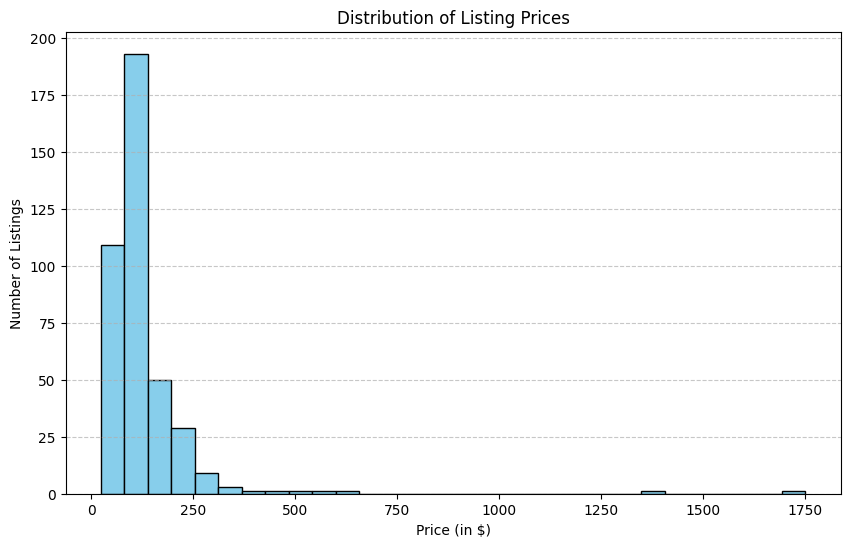

In [7]:
# Plotting price distribution
plt.figure(figsize=(10, 6))
plt.hist(listings_df['price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price (in $)')
plt.ylabel('Number of Listings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


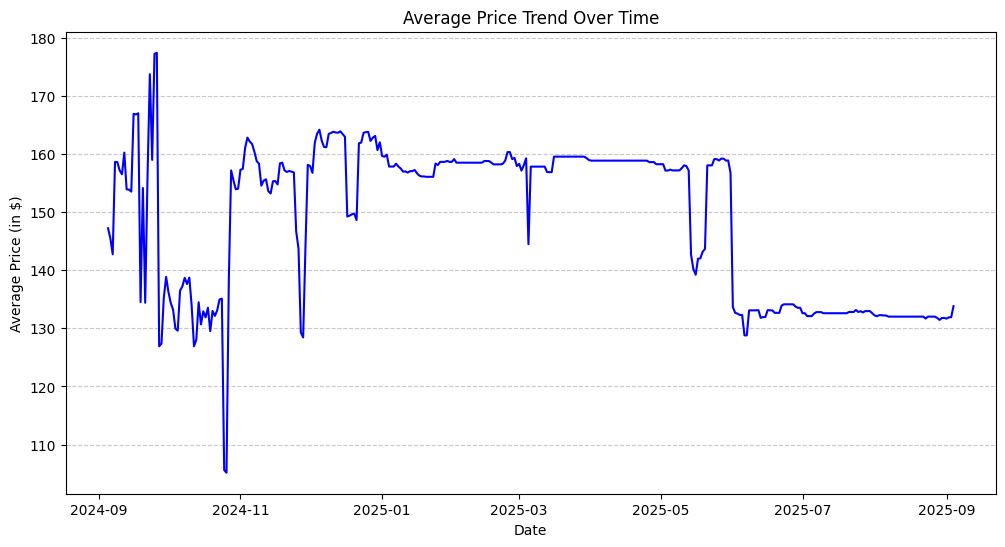

In [8]:
# Calculate average price per day for available listings
avg_price_by_date = calendar_df[calendar_df['available'] == 't'].groupby('date')['price'].mean()

# Plot average price trend
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_date, color='blue')
plt.title('Average Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (in $)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


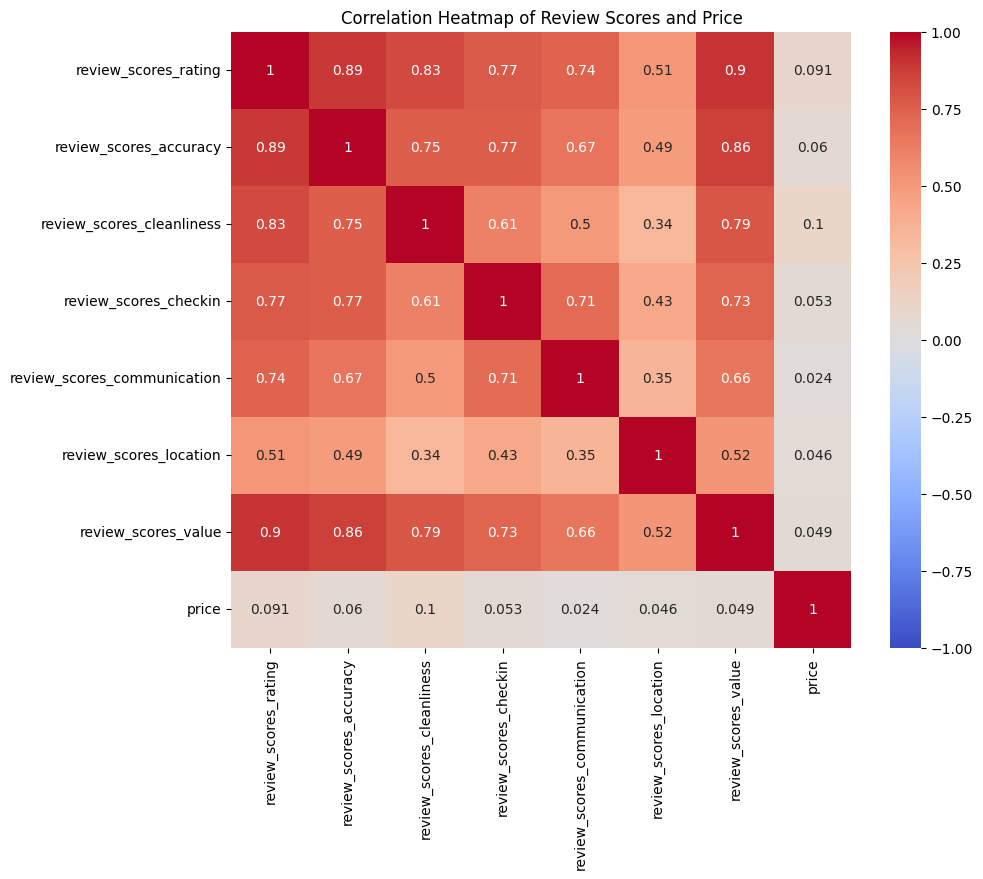

In [9]:
# Calculate correlation matrix for review scores and price
correlation_matrix = listings_df[score_columns + ['price']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Review Scores and Price')
plt.show()


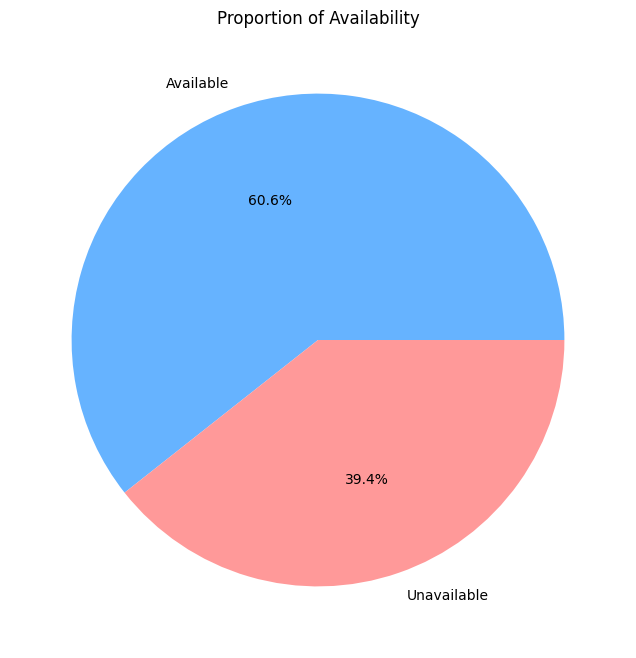